# Análisis de Inventario y Ventas 2017 para Optimización Comercial.

- Descripción general del contenido:
Base de datos de los inventarios y las ventas de una empresa importadora y distribuidora de productos para bebe a los almacenes Olimpica a nivel nacional durante el periodo de junio a septiembre del 2017.

- Variables más importantes:
  - ventas_df
  - final_stock_df
  - df_olimpicas_filtrado
  - df_data
  - inventario_por_ciudad
  - ventas_por_ciudad
  - df_combinado

- Objetivo del Análisis:
Identificar la correlación entre el inventario y las ventas del periodo Junio - Septiembre del año 2017 dentro de la cadena de supermercados Olímpica a nivel nacional.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# STOCK PDV OLIMPICA

In [ ]:
import pandas as pd

# Rutas a los archivos Excel en Drive con su respectivo mes
file_paths_meses = {
    '/content/drive/MyDrive/DATA ANALISYS PROYECT/INVENTARIO SEPTIEMBRE 2017.xlsx': '2017-09',
    '/content/drive/MyDrive/DATA ANALISYS PROYECT/INVENTARIO AGOSTO 2017.xlsx': '2017-08',
    '/content/drive/MyDrive/DATA ANALISYS PROYECT/INVENTARIO JUNIO 2017.xlsx': '2017-06',
    '/content/drive/MyDrive/DATA ANALISYS PROYECT/INVENTARIO JULIO 2017.xlsx': '2017-07'
}

# Lista para almacenar los DataFrames
dfs = []

# Columnas deseadas (inician con estas palabras)
columnas_deseadas = [
    'NEGOCIO', 'REFERENCIA', 'DESCRIPCIÓN',
    'CANTIDAD', 'MARCA'
]

# Leer, filtrar, agregar columna de mes
for path, mes in file_paths_meses.items():
    df = pd.read_excel(path)
    df.columns = df.columns.str.strip()  # Limpia espacios
    columnas_filtradas = [col for col in df.columns if any(col.startswith(prefix) for prefix in columnas_deseadas)]
    df_filtrado = df[columnas_filtradas].copy()
    df_filtrado['Mes'] = mes  # Añadir columna de tiempo
    dfs.append(df_filtrado)

# Unir todos los DataFrames
final_stock_df = pd.concat(dfs, ignore_index=True)

# Convertir la columna 'Mes' al tipo datetime
final_stock_df['Mes'] = pd.to_datetime(final_stock_df['Mes'])

# Renombrar las columnas para unificar conceptos
final_stock_df = final_stock_df.rename(columns={
    'DESCRIPCIÓN': 'DESCRIPCION',
    'NEGOCIO': 'ID_NEGOCIO',
    'Mes':'MES'
})

# Mostrar las primeras filas
final_stock_df.head()



,ID_NEGOCIO,MARCA,REFERENCIA,DESCRIPCION,CANTIDAD,MES
0,1031,GERBER,76077,CEP/PEIN GERBER BB 76077,1,2017-09-01
1,1093,GERBER,76077,CEP/PEIN GERBER BB 76077,1,2017-09-01
2,1203,GERBER,76077,CEP/PEIN GERBER BB 76077,1,2017-09-01
3,1251,GERBER,76077,CEP/PEIN GERBER BB 76077,1,2017-09-01
4,1256,GERBER,76077,CEP/PEIN GERBER BB 76077,1,2017-09-01


In [ ]:
final_stock_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7589 entries, 0 to 7588
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID_NEGOCIO   7589 non-null   int64         
 1   MARCA        7589 non-null   object        
 2   REFERENCIA   7589 non-null   object        
 3   DESCRIPCION  7589 non-null   object        
 4   CANTIDAD     7589 non-null   int64         
 5   MES          7589 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 355.9+ KB


**Explicación del código:**
Leer los archivos: Usamos un bucle para recorrer todas las rutas de archivo en la lista file_paths y cargar cada archivo Excel en un DataFrame con pd.read_excel().

**Concatenar los DataFrames:** Usamos pd.concat() para combinar todos los DataFrames en uno solo. El parámetro ignore_index=True asegura que los índices sean reorganizados de manera consecutiva después de la concatenación.

**Ver el resultado:** Con final_df.head() puedes ver las primeras filas del DataFrame combinado.

Si necesitas realizar alguna operación adicional, como agregar columnas para identificar el mes o año de cada archivo, avísame y te ayudo a ajustarlo.

##  Explicación del código: Unión de archivos de inventario con columna de mes

Este código carga varios archivos Excel que contienen información de inventarios mensuales y los une en una sola tabla, añadiendo una columna de tiempo correspondiente a cada mes. A continuación, se explican sus partes clave:

1. **Importación de pandas**  
   Se importa la librería `pandas` para manipular datos tabulares.

2. **Definición de archivos y fechas**  
   Se crea un diccionario donde se enlaza la ruta de cada archivo Excel con el mes al que corresponde (por ejemplo: `'2017-09'` para septiembre de 2017).

3. **Lista para almacenar los DataFrames**  
   Se inicializa una lista vacía `dfs` para guardar temporalmente los datos de cada archivo.

4. **Columnas deseadas**  
   Se especifican las columnas que se desea conservar. El código filtrará solo aquellas columnas cuyos nombres comiencen con los prefijos indicados (como `'NEGOCIO'`, `'REFERENCIA'`, etc.).

5. **Lectura y filtrado de cada archivo**  
   Se recorre cada archivo:
   - Se lee el Excel con `pd.read_excel`.
   - Se limpian los nombres de columnas para evitar errores por espacios.
   - Se filtran las columnas necesarias.
   - Se añade una nueva columna llamada `Mes` con el valor correspondiente al archivo.
   - Se agrega el resultado a la lista `dfs`.

6. **Unión final**  
   Todos los DataFrames se combinan usando `pd.concat()` y se reinician los índices.

7. **Visualización**  
   Se muestran las primeras filas del DataFrame combinado para confirmar que los datos están correctos.

Este proceso permite consolidar información mensual de inventario en un solo lugar, facilitando análisis posteriores.


# SALES

In [ ]:
import pandas as pd

# Rutas a los archivos Excel de ventas
file_paths = [
    '/content/drive/MyDrive/DATA ANALISYS PROYECT/VENTAS JUNIO 2017.xlsx',
    '/content/drive/MyDrive/DATA ANALISYS PROYECT/VENTAS JULIO 2017.xlsx',
    '/content/drive/MyDrive/DATA ANALISYS PROYECT/VENTAS AGOSTO 2017.xlsx',
    '/content/drive/MyDrive/DATA ANALISYS PROYECT/VENTAS SEPT 2017.xlsx'
]

# Diccionario para mapear meses en español a su número
meses_es_num = {
    'ENERO': '01', 'FEBRERO': '02', 'MARZO': '03', 'ABRIL': '04',
    'MAYO': '05', 'JUNIO': '06', 'JULIO': '07', 'AGOSTO': '08',
    'SEPT': '09', 'SEPTIEMBRE': '09', 'OCTUBRE': '10',
    'NOVIEMBRE': '11', 'DICIEMBRE': '12'
}

# Lista para almacenar los DataFrames
dfs = []

# Palabras clave de columnas que deben conservarse (inicio del nombre de columna)
columnas_deseadas = [
    'CODNEG', 'NOMMAR', 'REFERE', 'DESCRP',
    'CANTIDAD', 'VENTASPVP', 'CIUDAD'
]

# Leer, filtrar y agregar la columna 'Mes' en formato ISO (YYYY-MM)
for path in file_paths:
    df = pd.read_excel(path)
    columnas_filtradas = [col for col in df.columns if any(col.startswith(prefix) for prefix in columnas_deseadas)]
    df_filtrado = df[columnas_filtradas].copy()

    # Extraer mes y año del nombre del archivo
    nombre_archivo = path.split('VENTAS ')[-1].replace('.xlsx', '').upper()
    for nombre_mes, numero_mes in meses_es_num.items():
        if nombre_archivo.startswith(nombre_mes):
            anio = nombre_archivo[-4:]
            mes_iso = f'{anio}-{numero_mes}'
            break
    else:
        mes_iso = None  # En caso de que no coincida

    df_filtrado['Mes'] = mes_iso
    dfs.append(df_filtrado)

# Concatenar todos los DataFrames en uno solo
ventas_df = pd.concat(dfs, ignore_index=True)

# Renombrar columnas para unificar nombres
ventas_df = ventas_df.rename(columns={
    'CODNEG': 'ID_NEGOCIO',
    'NOMMAR': 'MARCA',
    'REFERE': 'REFERENCIA',
    'DESCRP': 'DESCRIPCION',
    'VENTASPVP': 'PRECIO',
    'Mes': 'MES',

})

# Convertir la columna 'Mes' a tipo datetime (no dará errores)
ventas_df['MES'] = pd.to_datetime(ventas_df['MES'])

# Ver las primeras filas del DataFrame combinado
ventas_df.head()



,CIUDAD,ID_NEGOCIO,MARCA,REFERENCIA,DESCRIPCION,CANTIDAD,PRECIO,MES
0,MTR,302,BBJOY,BBC01-BKG,BUTACA BBJOY BOOSTER BBC01-BKG NEG/GRIS,1,50000,2017-06-01
1,BAQ,1,BRIGHT STARS,8172,MASAJ ENCIAS BRIGHT STARTS 8172,1,17900,2017-06-01
2,BAQ,1,BRIGHT STARS,8487,SONAJ BRIGHT STARTS DOBLE TEXTURA 8487,4,179600,2017-06-01
3,BAQ,1,BRIGHT STARS,9177,SONAJ BRIGHT STARTS ELEFANTE 9177,1,26900,2017-06-01
4,BAQ,1,BRIGHT STARS,10220,MORDEDOR BRIGHT STARS AMIG BAILARI 10220,2,27800,2017-06-01


¿Qué hace este código?
Lee cada archivo Excel.

Añade una columna llamada Mes para que sepas de qué mes es cada fila.

Une todos los datos en un solo DataFrame llamado ventas_df.

In [ ]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CIUDAD       2766 non-null   object        
 1   ID_NEGOCIO   2766 non-null   int64         
 2   MARCA        2766 non-null   object        
 3   REFERENCIA   2766 non-null   object        
 4   DESCRIPCION  2766 non-null   object        
 5   CANTIDAD     2766 non-null   int64         
 6   PRECIO       2766 non-null   int64         
 7   MES          2766 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 173.0+ KB


# Puntos de ventas Olimpica Nacional 2017

In [ ]:
# Ruta al archivo Excel
file_path = '/content/drive/MyDrive/DATA ANALISYS PROYECT/Listado Olimpicas NAL.xlsx'

# Leer el archivo Excel
df = pd.read_excel(file_path)

# Filtrar las columnas que empiezan con 'NEG', 'NEGOCIO' o 'CIUDAD'
columnas_deseadas = ['NEG', 'NEGOCIO', 'CIUDAD', 'LATITUD', 'LONGITUD']
columnas_filtradas = [col for col in df.columns if any(col.startswith(prefix) for prefix in columnas_deseadas)]

# Crear un DataFrame filtrado
df_olimpicas_filtrado = df[columnas_filtradas].copy()

# Renombrar columnas para trabajar la misma sintaxis en todos los DF

df_olimpicas_filtrado = df_olimpicas_filtrado.rename(columns={
    'NEG': 'ID_NEGOCIO',
    'NEGOCIO': 'NOMBRE_NEGOCIO',

})


# Mostrar las primeras filas
df_olimpicas_filtrado.head()


,ID_NEGOCIO,NOMBRE_NEGOCIO,CIUDAD,LATITUD,LONGITUD
0,1001,SAO 53,Barranquilla,10.989062,-74.789202
1,1031,SAO Hipodromo,Barranquilla,10.927600,-74.778369
2,1310,SAO Buenavista Monteria,Monteria,8.778400,-75.860562
3,1043,SAO Miramar,Barranquilla,11.003285,-74.835331
4,1047,SAO Macarena,Barranquilla,10.953965,-74.807959


df_olimpicas_filtrado.info() para ver la estructura del DataFrame.

df_olimpicas_filtrado.columns para ver los nombres de las columnas.

df_olimpicas_filtrado.describe() para obtener estadísticas básicas si contiene datos numéricos.

# CONCAT STOCK & SALES



In [ ]:
df_data = pd.DataFrame()

df_data = pd.concat([df_data, final_stock_df[['MARCA', 'MES', 'CANTIDAD',  'REFERENCIA', 'DESCRIPCION','ID_NEGOCIO']]], ignore_index=True)
df_data = pd.concat([df_data, ventas_df[[ 'MARCA', 'MES', 'CANTIDAD',  'REFERENCIA', 'DESCRIPCION','ID_NEGOCIO']]], ignore_index=True)

df_data.head()

,MARCA,MES,CANTIDAD,REFERENCIA,DESCRIPCION,ID_NEGOCIO
0,GERBER,2017-09-01,1,76077,CEP/PEIN GERBER BB 76077,1031
1,GERBER,2017-09-01,1,76077,CEP/PEIN GERBER BB 76077,1093
2,GERBER,2017-09-01,1,76077,CEP/PEIN GERBER BB 76077,1203
3,GERBER,2017-09-01,1,76077,CEP/PEIN GERBER BB 76077,1251
4,GERBER,2017-09-01,1,76077,CEP/PEIN GERBER BB 76077,1256


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10355 entries, 0 to 10354
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   MARCA        10355 non-null  object        
 1   MES          10355 non-null  datetime64[ns]
 2   CANTIDAD     10355 non-null  int64         
 3   REFERENCIA   10355 non-null  object        
 4   DESCRIPCION  10355 non-null  object        
 5   ID_NEGOCIO   10355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 485.5+ KB


Esto garantiza que ambos concat:
Añadan correctamente los datos.
Reseteen los índices.
Sean más legibles.

# VENTAS POR CIUDAD &  INVENTARIO POR CIUDAD

ID_NEGOCIO de ventas_df no coincide con el de df_olimpicas_filtrado

In [ ]:
coincidencias = ventas_df['ID_NEGOCIO'].isin(df_olimpicas_filtrado['ID_NEGOCIO'])
print("Cantidad de coincidencias:", coincidencias.sum())

Cantidad de coincidencias: 0


VENTAS POR CIUDAD &  INVENTARIO POR CIUDAD

In [ ]:
# 1. Asociar cada ID_NEGOCIO con su ciudad
inventario_olimpicas = final_stock_df.merge(df_olimpicas_filtrado, on='ID_NEGOCIO', how='inner')

# 2. Agrupar inventario por ciudad
inventario_por_ciudad = inventario_olimpicas.groupby('CIUDAD')['CANTIDAD'].sum().reset_index(name='INVENTARIO')

# 3. Agrupar ventas por ciudad
ventas_por_ciudad = ventas_df.groupby('CIUDAD')['CANTIDAD'].sum().reset_index(name='VENTAS')

print("Ventas por ciudad:")
print(ventas_por_ciudad)

print("\nInventario por ciudad:")
print(inventario_por_ciudad)

Ventas por ciudad:
          CIUDAD  VENTAS
0            AGU     145
1            APR      96
2        Armenia     116
3            BUE      28
4   Barranquilla    1168
5         Bogota     491
6            CAR      42
7            CUC      67
8      Cartagena      74
9       Girardot      33
10           IBA     188
11           MAG     107
12      Monteria     311
13         Neiva       7
14       Popayan     100
15      Riohacha     157
16   Santa Marta     324
17     Sincelejo     189
18    Valledupar      46
19           YOP     108

Inventario por ciudad:
          CIUDAD  INVENTARIO
0        Armenia         877
1   Barranquilla        5454
2         Bogota        3193
3      Cartagena         918
4       Girardot         931
5       Monteria        2214
6          Neiva          55
7        Palmira           4
8        Popayan         733
9       Riohacha         624
10   Santa Marta        1033
11     Sincelejo        1742
12    Valledupar        1127


El campo de ID_NEGOCIO del dataframe de ventas_df no coincide con el de df_olimpicas_filtrado, por lo que se crearon las siguientes variables para establecer la relación entre ventas e inventario por ciudad, en el período de junio a septiembre de 2017:

inventario_por_ciudad: Esta variable se creó al unir final_stock_df con df_olimpicas_filtrado mediante el campo ID_NEGOCIO, lo que permite asociar cada inventario con su ciudad. Luego, se agrupa por CIUDAD y se suma la columna CANTIDAD para obtener el total de inventario por ciudad.

ventas_por_ciudad: Esta variable se generó agrupando el DataFrame ventas_df por CIUDAD y sumando la columna CANTIDAD, lo que da como resultado el total de ventas por ciudad.

Ademas, se determinó que las siguientes ciudades del DataFrame ventas_df no aparecen en final_stock_df:
AGU, APR, BUE, CAR, CUC, IBA, MAG, YOP

# **Visualizacion**

Gráfico de líneas - Ventas vs Inventario por mes de JUNIO - SEPTIEMBRE 2017

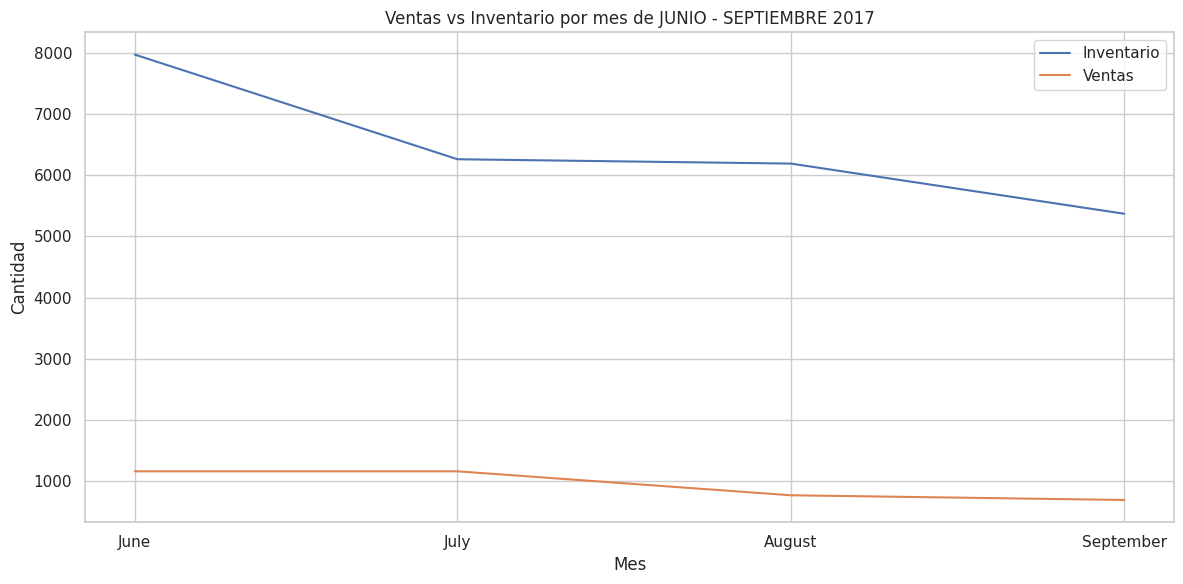

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Agrupamos y sumamos por mes
stock_mensual = final_stock_df.groupby('MES')['CANTIDAD'].sum().reset_index()
ventas_mensual = ventas_df.groupby('MES')['CANTIDAD'].sum().reset_index()

# Renombramos columnas
stock_mensual.rename(columns={'CANTIDAD': 'INVENTARIO'}, inplace=True)
ventas_mensual.rename(columns={'CANTIDAD': 'VENTAS'}, inplace=True)

# Unimos ambos dataframes
df_combinado = pd.merge(stock_mensual, ventas_mensual, on='MES')

# Estilo del gráfico
sns.set(style="whitegrid")

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x='MES', y='INVENTARIO', data=df_combinado, label='Inventario')
sns.lineplot(x='MES', y='VENTAS', data=df_combinado, label='Ventas')

# Formatear el eje X: mostrar solo un nombre de mes por mes
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Una etiqueta por mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Nombre del mes

# Etiquetas y título
plt.title('Ventas vs Inventario por mes de JUNIO - SEPTIEMBRE 2017')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend()
plt.tight_layout()
plt.show()




Gráfico de barras - Ventas e Inventario por Ciudad de JUNIO - SEPTIEMBRE 2017

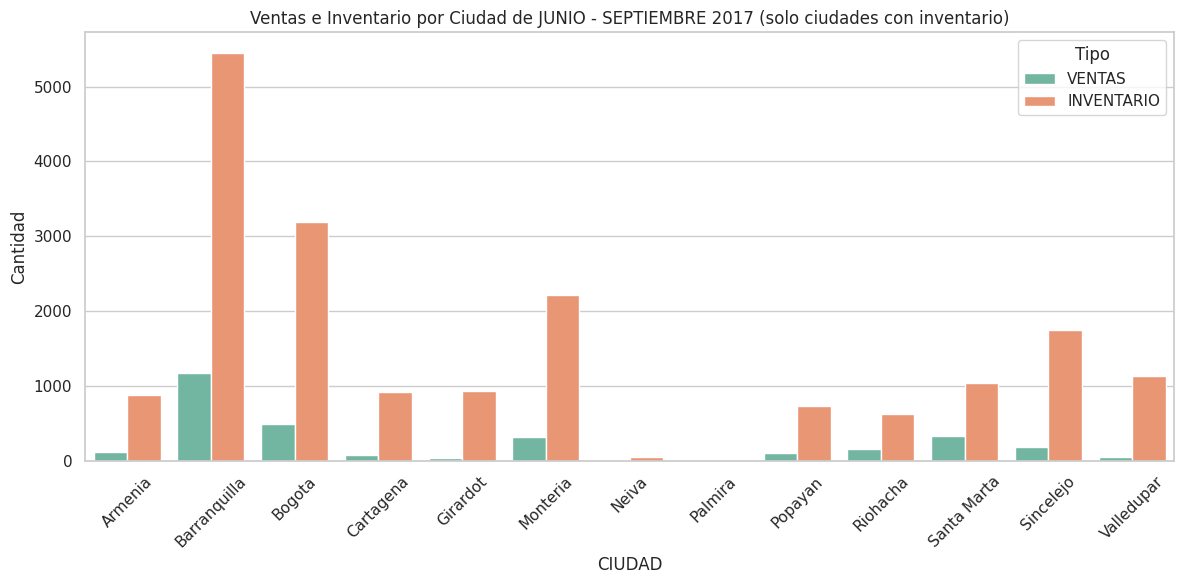

In [ ]:
# Mapear ciudades abreviadas a nombres completos
ciudad_map = {
    'ARM': 'Armenia',
    'BAQ': 'Barranquilla',
    'BOG': 'Bogota',
    'CTG': 'Cartagena',
    'GIR': 'Girardot',
    'MTR': 'Monteria',
    'NEI': 'Neiva',
    'POP': 'Popayan',
    'RIA': 'Riohacha',
    'STM': 'Santa Marta',
    'SLO': 'Sincelejo',
    'VDP': 'Valledupar',
    # Agrega más si es necesario
}

ventas_df['CIUDAD'] = ventas_df['CIUDAD'].replace(ciudad_map)

# Unir ventas por ciudad vs inventario por ciudad
df_ciudades = pd.merge(ventas_por_ciudad, inventario_por_ciudad, on='CIUDAD', how='outer').fillna(0)

# Filtrar ciudades con inventario > 0
df_filtrado = df_ciudades[df_ciudades['INVENTARIO'] > 0]

# Transformar a formato largo para graficar
df_melt = df_filtrado.melt(id_vars='CIUDAD', value_vars=['VENTAS', 'INVENTARIO'],
                           var_name='Tipo', value_name='Cantidad')

# Graficar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='CIUDAD', y='Cantidad', hue='Tipo', palette='Set2')
plt.title('Ventas e Inventario por Ciudad de JUNIO - SEPTIEMBRE 2017 (solo ciudades con inventario)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# CORRELACIÓN

In [ ]:
correlacion = df_combinado[['VENTAS', 'INVENTARIO']].corr()
print(correlacion)

              VENTAS  INVENTARIO
VENTAS      1.000000    0.738724
INVENTARIO  0.738724    1.000000


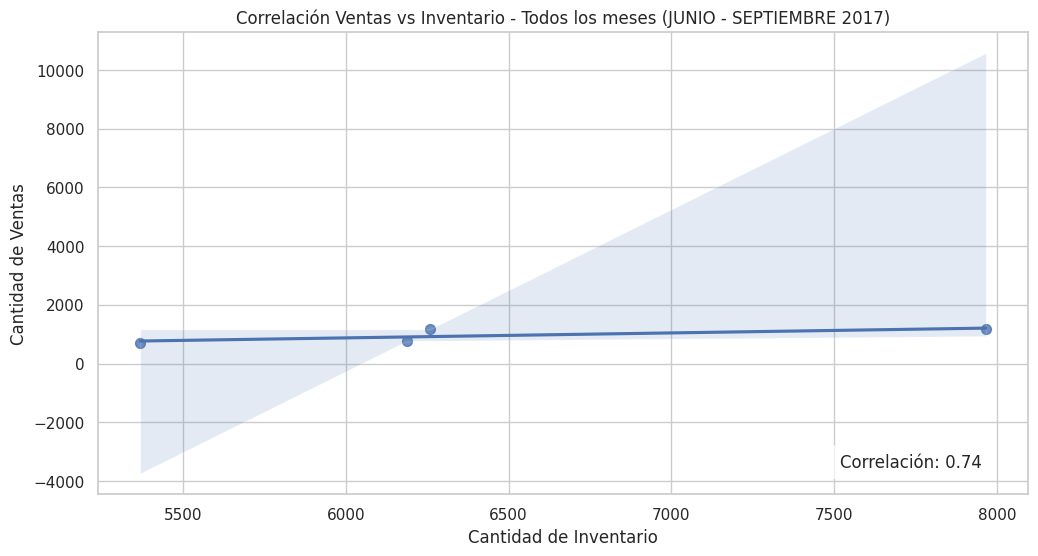

La correlación entre Inventario y Ventas para el período/mes seleccionado es: 0.74
Existe una correlación positiva fuerte: a mayor inventario, mayor tendencia a tener ventas altas.


In [ ]:
#GRAFICO CORRELACIÓN


import matplotlib.pyplot as plt
# Dropdown para seleccionar el mes
mes_seleccionado = 'Todos'  #@param ['Todos', '2017-06', '2017-07', '2017-08', '2017-09']

# Filtrar datos según la selección del dropdown
if mes_seleccionado != 'Todos':
    df_filtrado_mes = df_combinado[df_combinado['MES'].dt.strftime('%Y-%m') == mes_seleccionado].copy()
    titulo_grafico = f'Correlación Ventas vs Inventario - {mes_seleccionado}'
else:
    df_filtrado_mes = df_combinado.copy()
    titulo_grafico = 'Correlación Ventas vs Inventario - Todos los meses (JUNIO - SEPTIEMBRE 2017)'

# Calcular la correlación para los datos filtrados
correlacion_filtrada = df_filtrado_mes[['VENTAS', 'INVENTARIO']].corr().iloc[0, 1]

# Crear el gráfico de dispersión con línea de tendencia
plt.figure(figsize=(12, 6))
scatter_plot = sns.regplot(x='INVENTARIO', y='VENTAS', data=df_filtrado_mes, scatter_kws={'s': 50})

# Añadir título y etiquetas
plt.title(titulo_grafico)
plt.xlabel('Cantidad de Inventario')
plt.ylabel('Cantidad de Ventas')

# Añadir la etiqueta de correlación en el gráfico
plt.text(0.95, 0.05, f'Correlación: {correlacion_filtrada:.2f}',
         horizontalalignment='right', verticalalignment='bottom',
         transform=scatter_plot.transAxes,
         bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))


plt.grid(True)
plt.show()

# Imprimir el valor de correlación
print(f"La correlación entre Inventario y Ventas para el período/mes seleccionado es: {correlacion_filtrada:.2f}")

# Interpretar la correlación
if correlacion_filtrada > 0.7:
    print("Existe una correlación positiva fuerte: a mayor inventario, mayor tendencia a tener ventas altas.")
elif correlacion_filtrada > 0.3:
    print("Existe una correlación positiva moderada: a mayor inventario, hay una tendencia a tener ventas más altas.")
elif correlacion_filtrada > -0.3:
    print("Existe una correlación débil o inexistente.")
elif correlacion_filtrada > -0.7:
    print("Existe una correlación negativa moderada: a mayor inventario, hay una tendencia a tener ventas más bajas.")
else:
    print("Existe una correlación negativa fuerte: a mayor inventario, mayor tendencia a tener ventas bajas.")
